# SortPuz dans un notebook

Le jeu [SortPuz](https://play.google.com/store/apps/details?id=sortpuz.water.sort.puzzle.game&hl=fr_CA&gl=US) demande de manipuler des tubes à essai remplis de liquides colorés pour regrouper chaque couleur dans un même tube. Les règles sont simples :

1. On ne veut verser le _haut_ d'un tube que dans un tube vide ou dans un tube qui contient déjà du liquide de la même couleur en haut du tube et si il y a suffisamment de place
2. On ne peut pas dissocier un liquide : si votre tube contient n emplacements d'un liquide, verser ce tube aura pour effet de verser les n emplacements ; vous ne pouvez pas en verser une partie

Voici un exemple de configuration initiale :

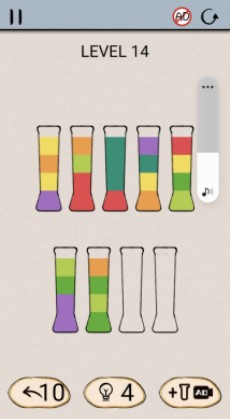

On se propose d'explorer ce jeu via Python, en utilisant les [ipythonblocks](http://www.ipythonblocks.org/) comme représentation graphique des tubes et des liquides. Le but étant au final de faire trouver la solution par Python... parce que certains défis sont très pénibles et **chronométrés** (moins de 1'30") !!! :-)

## Importer le module `sortpuz`

In [1]:
import sortpuz as sp

## Premier exemple : le niveau 14 de l'introduction

### Un fichier texte

Les couleurs sont à la fois des triplets rvb pour la vue via les blocks mais aussi de simples entiers. Le fichier texte ci-dessous représente l"exemple du niveau 14 de l'introduction :

```
9
3 2 7 2
8 8 4 7
8 6 6 6
7 2 6 3
4 5 2 8
3 3 5 4
5 4 5 7
```

Le nombre 9 signifie qu'il y a 9 tubes au total : on dispose donc de 2 tubes vides.

### Modélisation

In [3]:
L14 = sp.Puzzle('014.txt')

On visualise notre grille :

In [4]:
L14.show()

0  1  2  3  4  5  6  7  8  


### Jouer un `coup(...)`

Il s'agit de donner le numéro du tube de départ et de celui d'arrivée. L'appel retourne True si le déplacement a pu se faire.

In [5]:
L14.coup(0, 7)

True

In [6]:
L14.show()

0  1  2  3  4  5  6  7  8  


In [7]:
L14.coup(1, 0)

True

In [8]:
L14.show()

0  1  2  3  4  5  6  7  8  


Ce coup là n'est pas permis :

In [9]:
L14.coup(6, 1)

False

In [10]:
L14.show()

0  1  2  3  4  5  6  7  8  


### `undo()`... annuler le dernier coup

Retirons le dernier _carré_ orange du tube 0, qui venait du tube 6 :

In [11]:
L14.undo()

In [12]:
L14.show()

0  1  2  3  4  5  6  7  8  


### `coups` la mémoire des coups joués

Les coups sont mémorisés sous la forme d'un triplet : _(identifiant du tube de départ, identifiant du tube d'arrivée, nombre de cellules versées)_ 

In [13]:
L14.coups

[(0, 7, 1)]

### `jouer_coups(...)` pour jouer plusieurs coups

La liste des coups ci-dessous résout le problème L14.

In [14]:
S14 = [(6, 7), (1, 7), (5, 1), (5, 6), (3, 5), (2, 8), (3, 8), (0, 3), (0, 7), (0, 3), (0, 5), 
       (3, 0), (3, 7), (4, 2), (4, 0), (4, 3), (1, 4), (2, 1), (6, 3), (6, 4), (6, 3)]

Commençons par faire un _reset_ complet (il n'y a pas encore de fonction reset) :

In [15]:
L14 = sp.Puzzle('014.txt')

In [16]:
L14.jouer_coups(S14)

In [17]:
L14.show()

0  1  2  3  4  5  6  7  8  


### `win()` confirmer qu'on a fini

In [18]:
L14.win()

True

## Résolution automatique

Au départ ma motivation était de pouvoir trouver **rapidement** la solution à des défis du jeu : les défis sont chornométrés (1'20) et assez difficile. Une approche par simple _backtracking_ devrait suffire.

Dans ce type de résolution, il faut veiller à ne pas _tourner en rond_ : verser la totalité d'un tube A dans un tube B vide autorise ensuite le mouvement inverse de B vers A, sanss fin. Pour éviter cela, on mémorise les configuirations. Pour coder une configuration on utilise une liste ordonnée de nombres entiers : chaque entier est le code d'un tube.

### Code d'un tube

Si le tube est modélisé par la liste `[a, b, c, d]` alors on l'entier $abcd_{10}$ écrit en base 10 code ce tube (on sait qu'il y a moins de 10 couleurs... sinon il faudrait passer en héxadécimal).

### `tube(...)` pour obtenir un objet tube

Le premier tube de notre exemple L14 :

In [19]:
L14.tube(0)

Voyons son code :

In [20]:
L14.tube(0).code()

2222

Le code de la configuration finale du puzzle L14 :

In [21]:
L14.code()

[0, 0, 2222, 3333, 4444, 5555, 6666, 7777, 8888]

### Un défi

In [22]:
J1D2 = sp.Puzzle('defi02.txt')

In [23]:
J1D2.show()

0  1  2  3  4  5  6  7  8  9  


### Résolution automatique

In [24]:
J1D2.solve()

True

In [25]:
J1D2.show()

0  1  2  3  4  5  6  7  8  9  


### Récupération des coups...

Pour _tricher_ sur mon téléphone ;) ... Il va falloir être rapide : 28 coups à réaliser en 1'20".

In [26]:
J1D2.coups

[(0, 8, 1),
 (0, 9, 1),
 (4, 0, 1),
 (5, 4, 1),
 (1, 5, 1),
 (9, 1, 1),
 (3, 9, 1),
 (5, 9, 2),
 (5, 8, 1),
 (5, 3, 1),
 (0, 5, 2),
 (2, 5, 2),
 (3, 0, 2),
 (1, 3, 2),
 (1, 2, 1),
 (1, 9, 1),
 (2, 1, 2),
 (4, 2, 2),
 (6, 2, 1),
 (6, 0, 1),
 (1, 6, 2),
 (3, 1, 3),
 (6, 3, 3),
 (4, 6, 2),
 (7, 1, 1),
 (7, 4, 1),
 (4, 6, 1),
 (7, 8, 2)]

In [27]:
len(J1D2.coups)

28